## EDA

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
os.chdir('..')

In [4]:
os.getcwd()

'c:\\Users\\iiven\\Ai-Cursor\\Machine failure prediction'

In [5]:
df = pd.read_csv('Data/data.csv')
df.head()


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [7]:
df.shape

(944, 10)

In [8]:
categorical_features = ['tempMode']
numerical_features = ['footfall', 'AQ', 'USS', 'CS', 'VOC', 'RP', 'IP', 'Temperature']
target = ['fail']


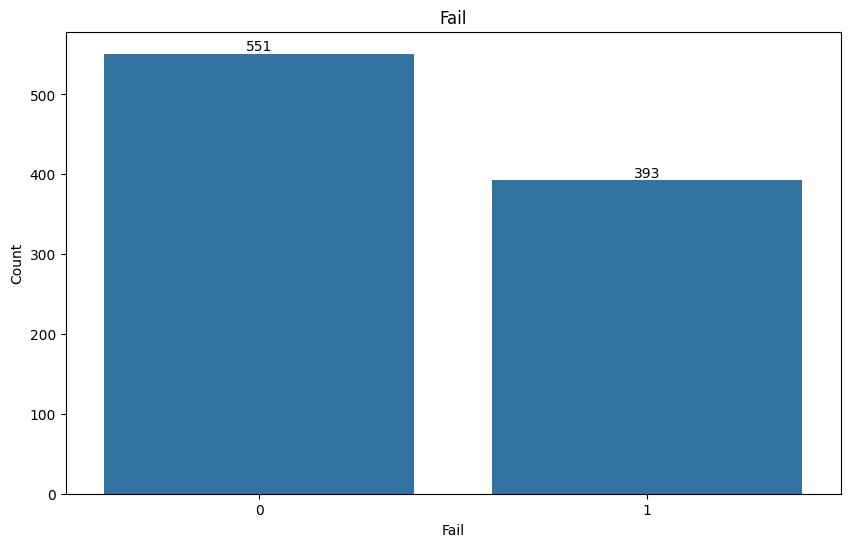

In [9]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='fail', data=df)
ax.set_title('Fail')
ax.set_xlabel('Fail')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0])
plt.show()


**Not a bad balance**

In [10]:
df['footfall'].describe()


count     944.000000
mean      306.381356
std      1082.606745
min         0.000000
25%         1.000000
50%        22.000000
75%       110.000000
max      7300.000000
Name: footfall, dtype: float64

**From the describe fuction we see an outlier**

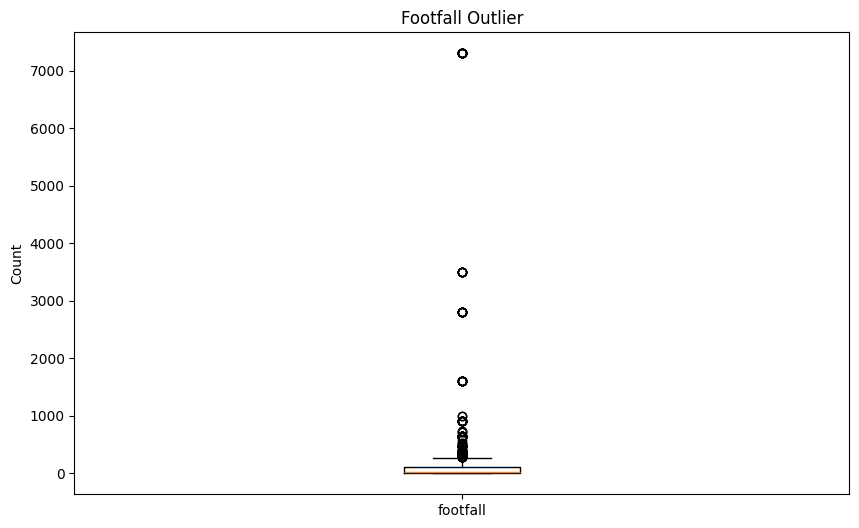

In [11]:
plt.figure(figsize=(10, 6))

plt.boxplot(df['footfall'])
plt.title('Footfall Outlier')
plt.ylabel('Count')
plt.xticks([1], ['footfall'])
plt.show()

**Using IQR to remove outliers**

In [12]:
df['footfall'].describe()

count     944.000000
mean      306.381356
std      1082.606745
min         0.000000
25%         1.000000
50%        22.000000
75%       110.000000
max      7300.000000
Name: footfall, dtype: float64

In [13]:
Q1 = 1.000000
Q3 = 110.000000
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

IQR, lower_bound, upper_bound


(109.0, -162.5, 273.5)

In [14]:
footfall_outliers = df[(df['footfall'] < lower_bound) | (df['footfall'] > upper_bound)]
footfall_outliers


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
4,640,7,5,6,4,0,68,6,1,0
9,2800,0,3,3,7,0,39,3,1,0
10,1600,0,3,2,4,4,26,2,1,0
11,330,5,4,3,6,1,31,4,1,0
14,1000,7,5,7,4,0,74,1,1,0
...,...,...,...,...,...,...,...,...,...,...
906,900,0,3,4,7,2,30,5,24,0
920,3500,7,7,3,5,4,34,7,24,0
930,7300,7,3,3,5,1,40,7,24,1
934,1600,7,4,2,5,6,56,7,24,1


In [15]:
df_new = df[(df['footfall'] > lower_bound) & (df['footfall'] < upper_bound)]
df_new.shape


(790, 10)

In [16]:
df_new['tempMode'].value_counts()


tempMode
7    238
0    137
2     99
3     90
1     80
5     61
4     56
6     29
Name: count, dtype: int64

In [17]:
df_new['AQ'].unique()


array([7, 3, 2, 5, 4, 6, 1])

In [18]:
df_new['AQ'].value_counts()


AQ
4    214
6    193
5    136
3    117
2     88
7     29
1     13
Name: count, dtype: int64

In [19]:
df_new['USS'].unique()


array([1, 3, 2, 4, 6, 7, 5])

In [20]:
df_new['USS'].value_counts()


USS
2    268
3    202
4    126
1    100
5     52
6     29
7     13
Name: count, dtype: int64

In [21]:
df_new['CS'].unique()


array([6, 5, 4, 3, 7, 2, 1])

In [22]:
df_new['CS'].value_counts()


CS
6    393
5    169
7     83
4     72
3     37
2     27
1      9
Name: count, dtype: int64

In [23]:
df_new['VOC'].unique()


array([6, 1, 4, 3, 5, 0, 2])

In [24]:
df_new['VOC'].value_counts()


VOC
6    158
0    158
1    146
5    125
2     93
4     78
3     32
Name: count, dtype: int64

In [25]:
df_new['RP'].unique()


array([36, 20, 24, 28, 21, 77, 31, 22, 42, 62, 58, 51, 88, 27, 44, 45, 40,
       48, 60, 32, 57, 84, 75, 19, 47, 35, 43, 76, 46, 68, 38, 69, 67, 72,
       37, 33, 30, 64, 59, 55, 65, 73, 91, 71, 34, 39, 83, 53, 82, 49, 56,
       74, 25, 85, 70, 78, 80, 79, 87, 52, 29, 23, 26, 50, 66, 61, 41, 63,
       54, 89, 81])

In [26]:
df_new['RP'].describe()


count    790.000000
mean      47.302532
std       16.471533
min       19.000000
25%       35.000000
50%       44.000000
75%       58.000000
max       91.000000
Name: RP, dtype: float64

In [27]:
df_new['RP'].value_counts().head(10)


RP
36    24
35    24
40    21
33    21
42    20
38    20
43    20
37    20
39    19
47    19
Name: count, dtype: int64

In [28]:
df_new['RP'].value_counts().tail(10)


RP
85    4
82    4
84    3
60    2
80    2
83    2
19    1
91    1
89    1
81    1
Name: count, dtype: int64

In [29]:
df_new['IP'].unique()


array([3, 4, 6, 5, 2, 1, 7])

In [30]:
df_new['IP'].value_counts()


IP
3    205
6    190
4    151
7    114
5     77
2     43
1     10
Name: count, dtype: int64

In [31]:
df_new['Temperature'].describe()


count    790.000000
mean      16.486076
std        5.943475
min        1.000000
25%       14.000000
50%       18.000000
75%       21.000000
max       24.000000
Name: Temperature, dtype: float64

**We see no possible outliers but we check for more accurate descisions**

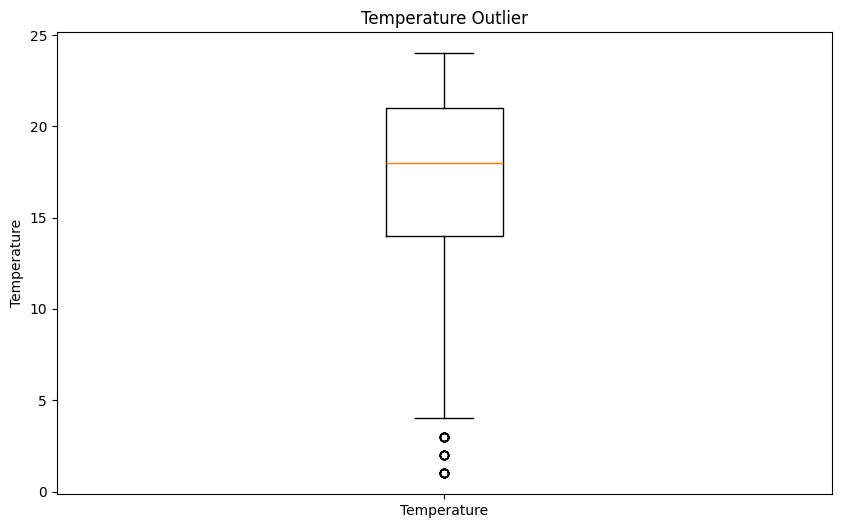

In [32]:
plt.figure(figsize=(10, 6))

plt.boxplot(df_new['Temperature'])
plt.title('Temperature Outlier')
plt.ylabel('Temperature')
plt.xticks([1], ['Temperature'])
plt.show()


**We have an outliers**

In [33]:
df_new['Temperature'].describe()


count    790.000000
mean      16.486076
std        5.943475
min        1.000000
25%       14.000000
50%       18.000000
75%       21.000000
max       24.000000
Name: Temperature, dtype: float64

In [34]:
Q1 = 14.000000
Q3 = 21.000000
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

IQR, lower_bound, upper_bound


(7.0, 3.5, 31.5)

In [35]:
df_new[(df_new['Temperature'] < lower_bound) | (df_new['Temperature'] > upper_bound)]


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
5,110,3,3,4,6,1,21,4,1,0
6,100,7,5,6,4,1,77,4,1,0
7,31,1,5,4,5,4,21,4,1,0
8,180,7,4,6,3,3,31,4,1,0
12,190,2,5,4,6,5,22,4,1,1
13,100,7,4,4,6,0,42,5,1,0


In [36]:
len(df_new[(df_new['Temperature'] < lower_bound) | (df_new['Temperature'] > upper_bound)])


38

In [37]:
df_final = df_new[(df_new['Temperature'] > lower_bound) & (df_new['Temperature'] < upper_bound)]
df_final.shape


(752, 10)

In [38]:
df_final['fail'].value_counts()


fail
0    413
1    339
Name: count, dtype: int64

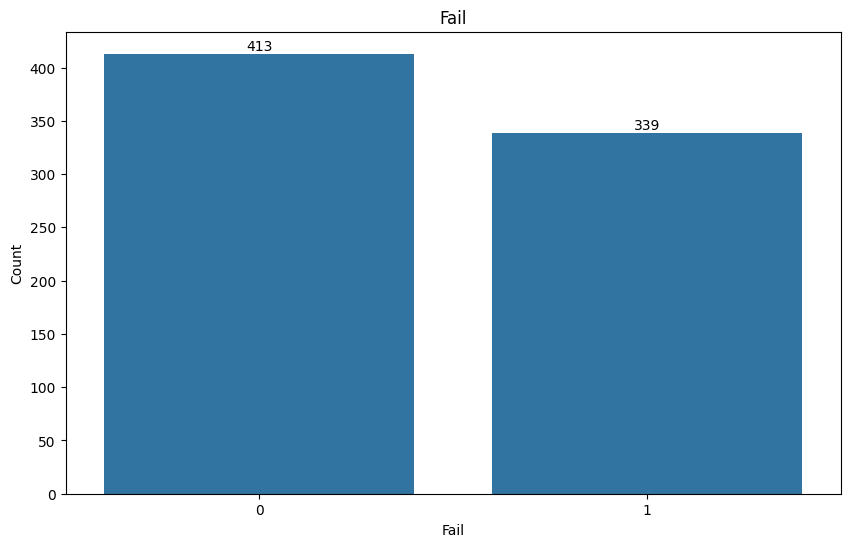

In [39]:
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='fail', data=df_final)
ax.set_title('Fail')
ax.set_xlabel('Fail')
ax.set_ylabel('Count')
ax.bar_label(ax.containers[0])
plt.show()


In [40]:
df_final

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
48,35,6,4,4,2,1,46,3,4,0
49,0,1,3,4,5,2,22,6,4,0
50,0,7,5,1,6,5,68,3,4,1
51,0,2,5,2,6,5,38,3,4,1
52,33,7,4,3,6,3,69,2,4,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [41]:
df_final.reset_index(inplace=True)
df_final.head()

,index,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,48,35,6,4,4,2,1,46,3,4,0
1,49,0,1,3,4,5,2,22,6,4,0
2,50,0,7,5,1,6,5,68,3,4,1
3,51,0,2,5,2,6,5,38,3,4,1
4,52,33,7,4,3,6,3,69,2,4,0


In [43]:
df_final.to_csv('Data/data_final.csv', index=False)
